<a href="https://colab.research.google.com/github/obeabi/Stats/blob/main/IndependentSample_Ttest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
!pip install pingouin
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.stats import norm, t, ttest_1samp, ttest_ind, ttest_rel, ttest_ind_from_stats
import pingouin as pg
from statsmodels.stats.weightstats import ttest_ind, ztest
print("Librariies installed!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 5.1 MB/s 
     |████████████████████████████████| 9.9 MB 19.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=51896472acb58190bd488d0ee98b05f1058a568767b101add5fe9a4a558cd946
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=6d0a68e9174e5a98290f1882587d1f5f457d529b08dbac6ee1904910d70e1c67
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


Librariies installed!


In [14]:
# Load dataset
df = pd.read_csv('FoodPrices.csv')

df.head()

,Average meal prices at restaurants in Gettysburg ($),Average meal prices at restaurants in Wilma ($)
0,9,11.0
1,5,10.0
2,6,12.0
3,11,9.0
4,8,8.0


In [15]:
# Summary statistics
df.describe()

,Average meal prices at restaurants in Gettysburg ($),Average meal prices at restaurants in Wilma ($)
count,18.000000,14.000000
mean,8.944444,11.142857
std,2.645134,2.178819
min,5.000000,8.000000
25%,7.000000,9.250000
50%,9.000000,11.000000
75%,11.000000,12.750000
max,13.000000,15.000000


In [17]:
# Check for missing values
df.isna().sum()

Average meal prices at restaurants in Gettysburg ($)    0
Average meal prices at restaurants in Wilma ($)         4
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


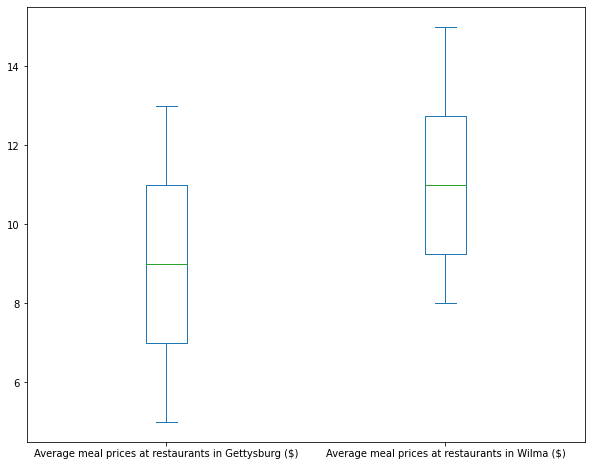

In [23]:
# Plot data as a boxplot

df.plot(kind = 'box', figsize = (10,8))
plt.show()

In [43]:
x1 = df['Average meal prices at restaurants in Gettysburg ($)'].values
x2 = df['Average meal prices at restaurants in Wilma ($)'].values

In [32]:
# Using scipy library
ttest_ind( x1, x2, equal_var= False,   nan_policy= "omit", alternative= "two-sided")

Ttest_indResult(statistic=-2.5769390582356815, pvalue=0.015153519382495284)

In [50]:
# Using Pinoguin library
pg.ttest(x1,x2, correction= True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.576939,29.870886,two-sided,0.015154,"[-3.94, -0.46]",0.89586,3.715,0.681876
